In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import cca.kron_pca
import scipy.linalg
from cca import ComplexityComponentsAnalysis
import scipy.signal
from math import floor
from sklearn.decomposition import PCA

In [2]:
def cca_pca(N, T, cross_cov_mats, min_dim=1, max_dim=None, skip=1, num_reps=1):
    opt = ComplexityComponentsAnalysis(T=T, init="random_ortho", device=None, use_scipy=True)
    opt.cross_covs = cross_cov_mats
    
    w, V = scipy.linalg.eigh(cross_cov_mats[0])
    w, V = w[::-1], V[:, ::-1]
    
    if max_dim is None:
        max_dim = N
        
    dim_vals = np.arange(min_dim, max_dim+1, skip)
    cca_pi_vals = np.zeros((len(dim_vals), num_reps))
    pca_pi_vals = np.zeros(len(dim_vals))
    V_set = []
    
    for dim_idx in range(len(dim_vals)):
        opt_dim = dim_vals[dim_idx]
        V_set_for_dim = []
        for rep_idx in range(num_reps):
            print("rep =", rep_idx+1)
            opt.fit_projection(d=opt_dim)
            V_set_for_dim.append(opt.coef_)
            cca_pi = opt.score()
            cca_pi_vals[dim_idx, rep_idx] = cca_pi
        V_set.append(V_set_for_dim)
        opt.coef_ = V[:, :opt_dim]
        pca_pi = opt.score()
        pca_pi_vals[dim_idx] = pca_pi
        
        print(opt_dim, cca_pi, pca_pi)
        
    return dim_vals, cca_pi_vals, pca_pi_vals, V_set

def sum_over_chunks(X, stride):
    zero_padded = np.zeros((stride*ceil(X.shape[0]/stride), X.shape[1]))
    zero_padded[:len(X), :] = X
    reshaped = zero_padded.reshape((int(len(zero_padded)/stride), stride, X.shape[1]))
    summed = reshaped.sum(axis=1)
    return summed[:-1]

def disp_cov(cov, title=None):
    s = np.max(np.abs(cov))
    plt.imshow(cov, vmin=-s, vmax=s, cmap="RdGy")
    plt.colorbar()
    plt.title(title, fontsize=16)


In [3]:
"""
Load data
"""

f = h5py.File("/home/davidclark/Projects/DataUtil/nhp_reaches_unsorted.hdf5", "r")
#print(list(f.keys()))
sessions = list(f.keys())
lengths = np.array([f[session]["M1"]["spikes"].shape[0] for session in sessions])
session = sessions[np.argsort(lengths)[::-1][0]]

spikes = f[session]["M1"]["spikes"]
cursor = f[session]["cursor"]

X = sum_over_chunks(spikes, 25)
cursor = sum_over_chunks(cursor, 25)

X = np.sqrt(X[:, X.sum(axis=0) > 1000])

#X = scipy.ndimage.gaussian_filter1d(X, sigma=1.0, axis=0)

X -= X.mean(axis=0)
X /= X.std(axis=0)

print(X.shape)

(33629, 91)


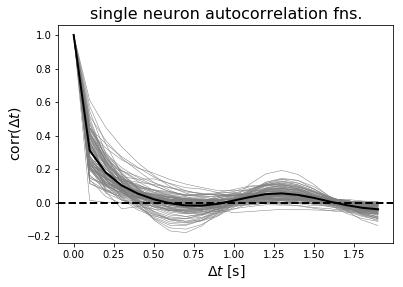

(33629, 91)


In [4]:
N = X.shape[1]
T_pi = 10
T = 2*T_pi

autocorr_fns = np.zeros((X.shape[1], T))

X_ctd = np.zeros_like(X)
window_size = 450 
for i in range(len(X)):
    if i - window_size//2 < 0:
        start, end = 0, window_size
    elif i + window_size//2 > len(X):
        start, end = len(X) - window_size, len(X)
    else:
        start, end = i - window_size//2, i + window_size//2
    X_ctd[i, :] = X[i] - X[start:end, :].mean(axis=0)

X_ctd -= X_ctd.mean(axis=0)
X_ctd /= X_ctd.std(axis=0)

for dt in range(T):
    autocorr_fns[:, dt] += np.sum((X_ctd[dt:]*X_ctd[:len(X_ctd)-dt]), axis=0)/(len(X_ctd)-dt)

t = np.arange(T)*0.1
plt.plot(t, autocorr_fns.T, c="gray", linewidth=0.5)
plt.plot(t, autocorr_fns.mean(axis=0), c="black", linewidth=2)
plt.axhline(0, c="black", linestyle="--", linewidth=2)

plt.xlabel("$\Delta t$ [s]", fontsize=14)
plt.ylabel("corr$(\Delta t)$", fontsize=14)
plt.title("single neuron autocorrelation fns.", fontsize=16)


plt.show()

print(X.shape)

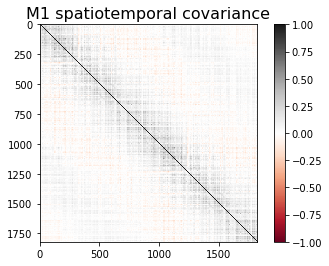

In [5]:
"""
Toeplitz-fy covariance and check that it's still PSD
"""

X_lags = cca.kron_pca.form_lag_matrix(X_ctd, T)
cov = np.dot(X_lags.T, X_lags)/len(X_lags)
cov_toep = cca.kron_pca.toeplitzify(cov, X.shape[1], T)

disp_cov(cov_toep, "M1 spatiotemporal covariance")
plt.show()

In [8]:
r_vals = np.arange(2*T - 1) + 1
sigma_vals = np.array([1e8]) #np.linspace(1, 2*T, 20)
ll_vals, r_opt, sigma_opt = cca.kron_pca.cv_toeplitz(X_lags, N=X.shape[1], T=T, r_vals=r_vals, sigma_vals=sigma_vals, num_folds=5)

print(r_opt, sigma_opt)

fold = 1
r = 1
r = 2
r = 3
r = 4
r = 5
r = 6
r = 7
r = 8
r = 9
r = 10
r = 11
r = 12
r = 13
r = 14
r = 15
r = 16
r = 17
r = 18
r = 19
r = 20
r = 21
r = 22
r = 23
r = 24
r = 25
r = 26
r = 27
r = 28
r = 29
r = 30
r = 31
r = 32
r = 33
r = 34
r = 35
r = 36
r = 37
r = 38
r = 39
fold = 2
r = 1
r = 2
r = 3
r = 4
r = 5
r = 6
r = 7
r = 8
r = 9
r = 10
r = 11
r = 12
r = 13
r = 14
r = 15
r = 16
r = 17
r = 18
r = 19
r = 20
r = 21
r = 22
r = 23
r = 24
r = 25
r = 26
r = 27
r = 28
r = 29
r = 30
r = 31
r = 32
r = 33
r = 34
r = 35
r = 36
r = 37
r = 38
r = 39
fold = 3
r = 1
r = 2
r = 3
r = 4
r = 5
r = 6
r = 7
r = 8
r = 9
r = 10
r = 11
r = 12
r = 13
r = 14
r = 15
r = 16
r = 17
r = 18
r = 19
r = 20
r = 21
r = 22
r = 23
r = 24
r = 25
r = 26
r = 27
r = 28
r = 29
r = 30
r = 31
r = 32
r = 33
r = 34
r = 35
r = 36
r = 37
r = 38
r = 39
fold = 4
r = 1
r = 2
r = 3
r = 4
r = 5
r = 6
r = 7
r = 8
r = 9
r = 10
r = 11
r = 12
r = 13
r = 14
r = 15
r = 16
r = 17
r = 18
r = 19
r = 20
r = 21
r = 22
r = 23
r = 24
r = 25
r = 26

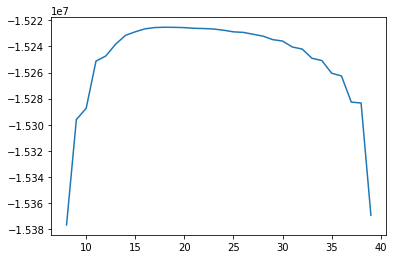

In [16]:
ll_avg = ll_vals.mean(axis=0)
start = 7
for sigma_idx in range(len(sigma_vals)):
    plt.plot(r_vals[start:], ll_avg[start:, sigma_idx], label="$\sigma$="+str(sigma_vals[sigma_idx]))
#plt.legend()
plt.show()

In [49]:
r_opt, sigma_opt = 19, 2.
N = X.shape[1]

cov_reg_taper = cca.kron_pca.toeplitz_reg_and_taper(cov_toep, N, T, r_opt, sigma_opt)
cross_cov_mats = cca.cov_util.calc_cross_cov_mats_from_cov(N, T, cov_reg_taper)

In [50]:
T_pi_vals = np.arange(3) + 1
all_pi_vals = []

for T_pi_sub_idx in range(len(T_pi_vals)):
    T_pi_sub = T_pi_vals[T_pi_sub_idx]
    cross_cov_mats_sub = cross_cov_mats[:2*T_pi_sub, :, :]
    dim_vals, cca_pi_vals, pca_pi_vals, V_set = cca_pca(X.shape[1], 2*T_pi_sub, cross_cov_mats_sub,
                                                    min_dim=1, max_dim=X.shape[1],
                                                    skip=10, num_reps=1)
    all_pi_vals.append(cca_pi_vals)






rep = 1
1 0.5548003016511229 0.23391845108881038
rep = 1
11 3.192940797001031 2.5529453680771304
rep = 1
21 3.9727230446642126 3.1017240035100584
rep = 1
31 4.377402746052013 3.2570040028388383
rep = 1
41 4.637084393226213 3.40175235263903
rep = 1
51 4.824378659346678 3.5559170108429807
rep = 1
61 4.977507271868654 3.7030836718595403
rep = 1
71 5.110630639798324 3.8472006593763988
rep = 1
81 5.224464308928369 4.012539927095506
rep = 1
91 5.3223225791141395 4.177458645195072
rep = 1
101 5.405716894793532 4.351391029228197
rep = 1
111 5.477847758802309 4.539111884632709
rep = 1
121 5.539604984919953 4.764466121556013
rep = 1
131 5.59049341067901 5.0159674693126215
rep = 1
141 5.629415134745594 5.325209936176408
rep = 1
1 0.6773269773069033 0.30810715384530035
rep = 1
11 3.448162960405127 2.765939864272444
rep = 1
21 4.264191570854623 3.3483389124791594
rep = 1
31 4.699204157722067 3.525501283087198
rep = 1
41 4.99160268718839 3.696500046126002
rep = 1
51 5.215760755461872 3.8821744755971

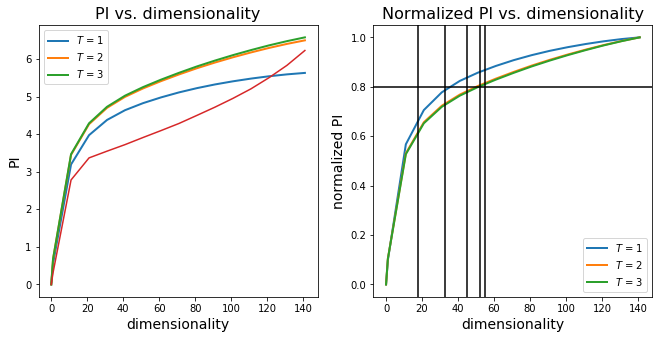

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(11, 5))
ax1, ax2 = axes.flatten()
x = np.array([0] + list(dim_vals))

for T_idx in range(len(T_pi_vals)):
    
    pi = all_pi_vals[T_idx].flatten()
    y = np.array([0] + list(pi))
    ax1.plot(x, y, label="$T$ = " + str(T_idx+1), linewidth=2)
    ax2.plot(x, y/np.max(y), label="$T$ = " + str(T_idx+1), linewidth=2)

ax1.plot(x, [0] + list(pca_pi_vals))
    
ax1.set_xlabel("dimensionality", fontsize=14)
ax1.set_ylabel("PI", fontsize=14)
ax1.set_title("PI vs. dimensionality", fontsize=16)

ax2.set_xlabel("dimensionality", fontsize=14)
ax2.set_ylabel("normalized PI", fontsize=14)
ax2.set_title("Normalized PI vs. dimensionality", fontsize=16)
ax2.legend()

ax2.axhline(0.8, c="black")

ax2.axvline(18, c="black")
ax2.axvline(33, c="black")
ax2.axvline(45, c="black")
ax2.axvline(52, c="black")
ax2.axvline(55, c="black")


ax1.legend()

#plt.savefig("nhp_figs/pivsdim.pdf", bbox_inches="tight")

    

Text(0.5,1,'dimensionality vs. T')

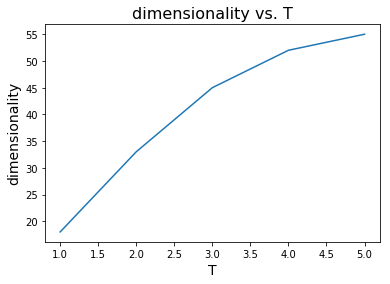

In [22]:
plt.plot([1, 2, 3, 4, 5], [18, 33, 45, 52, 55])
plt.xlabel("T", fontsize=14)
plt.ylabel("dimensionality", fontsize=14)
plt.title("dimensionality vs. T", fontsize=16)

#plt.savefig("nhp_figs/dimvst.pdf", bbox_inches="tight")

In [57]:
X_lags = cca.kron_pca.form_lag_matrix(X_ctd, T)
cov = np.dot(X_lags.T, X_lags)/len(X_lags)

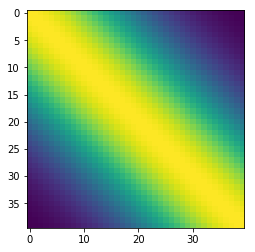

1 10.738682862048014
2 12.835192425066253
3 14.651308190339114
4 16.304044951433085
5 17.718116146128406
6 18.889479483588545
7 19.668539022676324
8 20.222781401754762
9 20.62349501104285
10 20.910590617991705
11 21.1253348423462
12 21.291392289813604
13 21.413157729599092
14 21.503733405793767
15 21.574159072691305
16 21.62821872694018
17 21.669707525690114
18 21.701373003641276
19 21.72518621669024
20 21.743234150046025


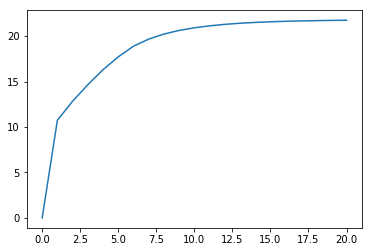

In [65]:
N = X.shape[1]
r = 14

cov_reg = cca.kron_pca.toeplitz_reg_threshold(cov, N, T, r)

t = np.arange(T).reshape((T, 1))
delta_t = np.abs(t - t.T)
kern = np.exp(-(delta_t / 20.)**2)
kern_full = np.kron(kern, np.ones((N, N)))
cov_smush = kern_full * cov_reg

plt.imshow(kern)
plt.show()

vals = []
for i in range(1, T//2 + 1):
    pi = cca.cov_util.calc_pi_from_cov(cov_smush[:2*i*N, :2*i*N])
    print(i, pi)
    vals.append(pi)
    
plt.plot(np.arange(T//2 + 1), [0] + vals)
plt.show()

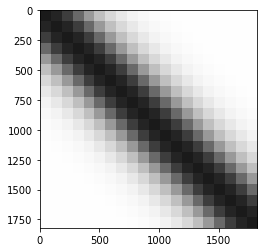

In [91]:
N = X.shape[1]
kern = cca.kron_pca.taper_cov(np.ones((N*T, N*T)), N, T, sigma=5)
plt.imshow(kern, vmin=-1, vmax=1, cmap="RdGy")

In [ ]:
"""
Visualize how many factors go into the covariance matrix
"""

R = cca.kron_pca.pv_rearrange(cov_toep, X.shape[1], T)
U, s, Vt = scipy.linalg.svd(R, full_matrices=False)
s_nonzero = s[:2*T - 1]
s_cum = np.cumsum(s_nonzero)/np.sum(s_nonzero)

plt.plot(np.arange(len(s_cum))+1, s_cum)
plt.xlabel("num. Kronecker factors", fontsize=14)
plt.ylabel("% Frobenius norm", fontsize=14)
plt.title("Kronecker decomposition of covariance", fontsize=16)

#plt.savefig("nhp_figs/kron_decomp.pdf", bbox_inches="tight")

plt.show()

In [10]:
N = X.shape[1]
pi_vals = []

X_temp = np.copy((X - X.mean(axis=0)/X.std(axis=0)))

for dim in range(1, N+1):
    
    X_lags = cca.kron_pca.form_lag_matrix(X_temp, T)
    cov = np.dot(X_lags.T, X_lags)/len(X_lags)
    cross_cov_mats = cca.cov_util.calc_cross_cov_mats_from_cov(N - dim + 1, T, cov)

    opt = ComplexityComponentsAnalysis(T=T, init="random_ortho", device=None, use_scipy=True)
    opt.cross_covs = cross_cov_mats
    opt.fit_projection(d=1)
    pi = opt.score()
    v = opt.coef_.flatten()
    pi_vals.append(pi)
    
    #subtract out the optimal direction
    proj = np.eye(N - dim + 1) - np.outer(v, v)
    proj_X = np.dot(X_temp, proj.T)
    pca = PCA(n_components=N-dim)
    X_temp = pca.fit_transform(proj_X)
    
    print(dim, pi)
    
    
    





[[ 3.30765356e-01 -2.58873596e-01  1.59809006e+00  7.13201124e-02
   1.22765478e-01]
 [-5.82610540e-01  2.05463795e-01  3.25135110e-01 -3.38554952e-01
   2.11595942e-01]
 [-2.09285720e+00 -8.26982093e-01 -1.13481018e+00 -4.29773957e-04
   3.38849049e-01]
 [-6.41852850e-01 -4.76781315e-01  8.02689993e-01 -4.45090938e-02
   8.14929352e-01]
 [-1.34951880e-01  1.08435904e-01  6.53494297e-01  1.00082489e+00
  -6.62019626e-02]]


(0, 2)

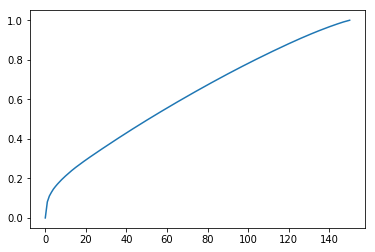

In [52]:
C = cross_cov_mats[0]
w = scipy.linalg.eigvalsh(C)[::-1]
plt.plot(([0] + list(np.cumsum(w)))/np.sum(w))